# Part 1 Tensor Basics



In [2]:
import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices("GPU")

2.4.1


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
#Single Scaler
t1 = tf.constant([4,2], dtype = tf.float32)#Rank 1 
print(t1)

tf.Tensor([4. 2.], shape=(2,), dtype=float32)


In [ ]:
t2 = tf.constant([[4,5,6],[4,5,6]], dtype = tf.float32)#Rank 2 
print(t2)

tf.Tensor(
[[4. 5. 6.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)


In [ ]:
t3 = tf.ones((3,3))
print(t3)

t4 = tf.zeros((3,3))
print(t4)

t5 = tf.eye(3)
print(t5)

tf.Tensor(
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]], shape=(3, 3), dtype=float32)


In [ ]:
t6 = tf.random.normal((3, 3), mean = 0, stddev = 1)
print(t6)

t7 = tf.random.uniform((3, 3), minval = 0, maxval = 1)
print(t7)

tf.Tensor(
[[ 0.549319    0.90468097 -2.9896052 ]
 [-0.907       1.193803    0.37174562]
 [-0.42718694  0.45983934  0.30129611]], shape=(3, 3), dtype=float32)
tf.Tensor(
[[0.753832   0.34404862 0.090922  ]
 [0.00724983 0.59444475 0.16579485]
 [0.7682599  0.14270735 0.8295386 ]], shape=(3, 3), dtype=float32)


In [ ]:
t8 = tf.range(10)
print(t8)

t9 = tf.cast(t8, dtype = tf.float32)
print(t9)

tf.Tensor([0 1 2 3 4 5 6 7 8 9], shape=(10,), dtype=int32)
tf.Tensor([0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], shape=(10,), dtype=float32)


In [ ]:
a = tf.constant([5,6,7])
b = tf.constant([1,2,3])
z = tf.add(a,b)
x = tf.subtract(a,b)
m = tf.multiply(a,b)
t = tf.tensordot(a,b, axes = 1)
g = tf.tensordot(a,b, axes = 0)
print(z, x, m)
print(t,g)

tf.Tensor([ 6  8 10], shape=(3,), dtype=int32) tf.Tensor([4 4 4], shape=(3,), dtype=int32) tf.Tensor([ 5 12 21], shape=(3,), dtype=int32)
tf.Tensor(38, shape=(), dtype=int32) tf.Tensor(
[[ 5 10 15]
 [ 6 12 18]
 [ 7 14 21]], shape=(3, 3), dtype=int32)


In [ ]:
a = tf.constant([[5,6,7], [5,6,7]])
b = tf.constant([[1,2], [5,6], [2,3]])
print(tf.matmul(a,b)) #matrix çarpımı


tf.Tensor(
[[49 67]
 [49 67]], shape=(2, 2), dtype=int32)


In [ ]:
x = tf.random.normal((2,3))
print(x)
x = tf.reshape(x, (3,2))
print(x)

tf.Tensor(
[[ 0.51091886 -0.58094054 -0.15954164]
 [ 0.79156667 -0.86107236  0.06719451]], shape=(2, 3), dtype=float32)
tf.Tensor(
[[ 0.51091886 -0.58094054]
 [-0.15954164  0.79156667]
 [-0.86107236  0.06719451]], shape=(3, 2), dtype=float32)


In [ ]:
x = tf.reshape(x, (-1,3))#-1 burada kod tamamlasın demek
print(x)

tf.Tensor(
[[ 0.51091886 -0.58094054 -0.15954164]
 [ 0.79156667 -0.86107236  0.06719451]], shape=(2, 3), dtype=float32)


In [ ]:
x = tf.random.normal((2,3))
x = x.numpy()
print(x)

[[ 1.3833514 -0.8369244 -1.1831447]
 [-0.5552844  1.5516944  0.1585774]]


In [ ]:
x = tf.convert_to_tensor(x)
print(x)

tf.Tensor(
[[ 1.3833514 -0.8369244 -1.1831447]
 [-0.5552844  1.5516944  0.1585774]], shape=(2, 3), dtype=float32)


In [ ]:
x = tf.Variable([3,2,1])#model parametreleri tutmak için kullanılır
print(x)

<tf.Variable 'Variable:0' shape=(3,) dtype=int32, numpy=array([3, 2, 1], dtype=int32)>


# Part 2 Neural Net


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [ ]:
#Load Dataset
mnist = keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
#Normalize
x_train, x_test = x_train / 255, x_test / 255

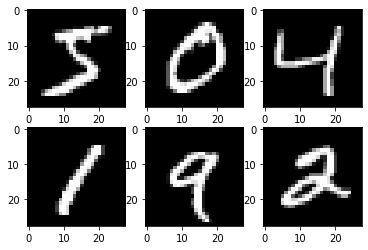

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(x_train[i], cmap = 'gray')
plt.show();

In [ ]:
#Model
model = keras.models.Sequential([
        keras.layers.Flatten(input_shape = (28,28)),
        keras.layers.Dense(128, activation = 'relu'),
        keras.layers.Dense(10),
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
#model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape = (28,28))) #teker teker katman ekleme

In [ ]:
#Loss and Optimizer
loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True)#ağımızın en son kısmında fonksiyon eksikse 
optim = keras.optimizers.Adam(lr = 0.001)
metrics = ["accuracy"]

model.compile(loss = loss, optimizer = optim, metrics = metrics)

In [ ]:
#Training
batch_size = 64
epochs = 5
model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, shuffle = True, verbose = 2)

Epoch 1/5
938/938 - 4s - loss: 0.2973 - accuracy: 0.9172
Epoch 2/5
938/938 - 2s - loss: 0.1373 - accuracy: 0.9598
Epoch 3/5
938/938 - 2s - loss: 0.0958 - accuracy: 0.9721
Epoch 4/5
938/938 - 2s - loss: 0.0732 - accuracy: 0.9781
Epoch 5/5
938/938 - 2s - loss: 0.0585 - accuracy: 0.9826


In [ ]:
#Evaluate
model.evaluate(x_test, y_test, batch_size = batch_size, verbose = 2)

157/157 - 0s - loss: 0.0805 - accuracy: 0.9751


[0.08051790297031403, 0.9750999808311462]

In [ ]:
#predictions option 1
probility_model = keras.models.Sequential([
                  model,
                  keras.layers.Softmax()
])

predictions = probility_model(x_test)
pred = predictions[0]
label = np.argmax(pred)
print(label)

7


In [ ]:
#predictions option 2
predictions = model(x_test)
predictions = tf.nn.softmax(predictions)
pred = predictions[0]
label = np.argmax(pred)
print(label)

7


In [ ]:
#predictions option 3
predictions = model.predict(x_test, batch_size=batch_size)
predictions = tf.nn.softmax(predictions)
pred = predictions[0]
label = np.argmax(pred)
print(label)

7


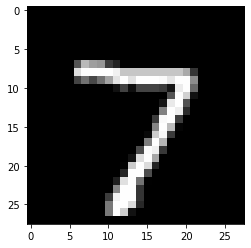

In [ ]:
plt.imshow(x_test[0], cmap = 'gray')

# Part 3 Linear Regression

In [ ]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision = 3, suppress = True)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names, na_values='?',
                      comment='\t', sep=' ', skipinitialspace=True)

In [ ]:
dataset = dataset.dropna()
dataset.shape

(392, 8)

In [ ]:
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1) * 1
dataset['Europe'] = (origin == 2) * 1
dataset['Japan'] = (origin == 3) * 1
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1,0,0


In [ ]:
# Split the data into train and test
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset = dataset.drop(train_dataset.index)

print(dataset.shape, train_dataset.shape, test_dataset.shape)
train_dataset.describe().transpose()

(392, 10) (314, 10) (78, 10)


,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.310510,7.728652,10.0,17.00,22.0,28.95,46.6
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [ ]:
# split features from labels
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [ ]:
def plot(feature, x=None, y=None):
    plt.figure(figsize=(10, 8))
    plt.scatter(train_features[feature], train_labels, label='Data')
    if x is not None and y is not None:
        plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel(feature)
    plt.ylabel('MPG')
    plt.legend()

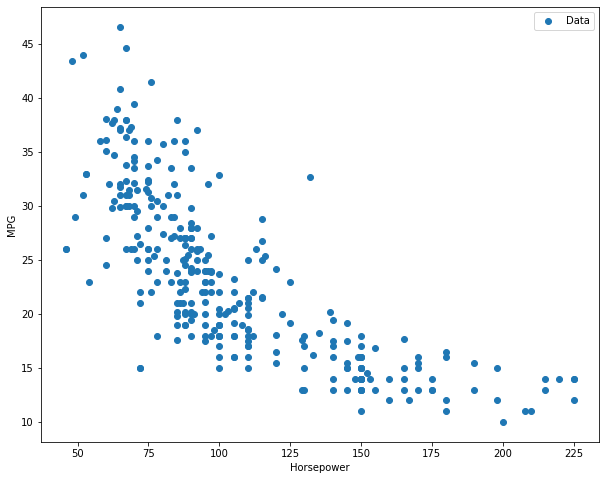

In [ ]:
plot('Horsepower')

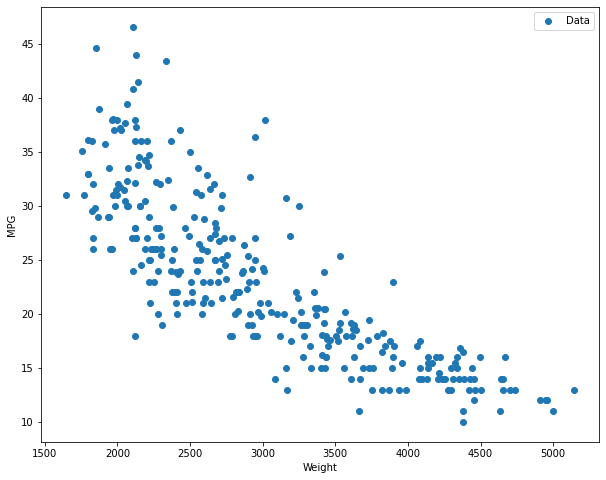

In [ ]:
plot('Weight')

In [ ]:
print(train_dataset.describe().transpose()[['mean', 'std']])

# Normalization
normalizer = preprocessing.Normalization()

# adapt to the data
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

                     mean         std
MPG             23.310510    7.728652
Cylinders        5.477707    1.699788
Displacement   195.318471  104.331589
Horsepower     104.869427   38.096214
Weight        2990.251592  843.898596
Acceleration    15.559236    2.789230
Model Year      75.898089    3.675642
USA              0.624204    0.485101
Europe           0.178344    0.383413
Japan            0.197452    0.398712
[   5.478  195.318  104.869 2990.252   15.559   75.898    0.624    0.178
    0.197]


In [ ]:
print(train_features.shape)
print(normalizer)

(314, 9)


In [ ]:
# When the layer is called it returns the input data, with each feature independently normalized:
# (input-mean)/stddev
first = np.array(train_features[:1])
print('First example:', first)
print('Normalized:', normalizer(first).numpy())

First example: [[   4.    90.    75.  2125.    14.5   74.     1.     0.     0. ]]
Normalized: [[-0.871 -1.011 -0.785 -1.027 -0.38  -0.517  0.776 -0.466 -0.496]]


In [ ]:
# Regression
 # 1. Normalize the input horsepower
 # 2. Apply a linear transformation (y = m*x+b) to produce 1 output using layers.Dense

feature = 'Horsepower'
single_feature = np.array(train_features[feature])
print(single_feature.shape, train_features.shape)

# Normalization
single_feature_normalizer = preprocessing.Normalization()

# adapt to the data
single_feature_normalizer.adapt(single_feature)

(314,) (314, 9)


In [ ]:
# Sequential model
single_feature_model = keras.models.Sequential([
    single_feature_normalizer,
    layers.Dense(units=1) # Linear Model
])

In [ ]:
single_feature_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# loss and optimizer
loss = keras.losses.MeanAbsoluteError() # MeanSquaredError
optim = keras.optimizers.Adam(lr=0.1)

single_feature_model.compile(optimizer=optim, loss=loss)

In [ ]:
history = single_feature_model.fit(
    train_features[feature], train_labels,
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 52ms/step - loss: 23.0676 - val_loss: 22.9371
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 21.9549 - val_loss: 22.1373
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 21.5413 - val_loss: 21.3371
Epoch 4/100
8/8 [==============================] - 0s 7ms/step - loss: 20.9439 - val_loss: 20.5371
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 19.8706 - val_loss: 19.7373
Epoch 6/100
8/8 [==============================] - 0s 9ms/step - loss: 18.8553 - val_loss: 18.9372
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 17.6214 - val_loss: 18.1373
Epoch 8/100
8/8 [==============================] - 0s 8ms/step - loss: 18.1486 - val_loss: 17.3372
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 17.2589 - val_loss: 16.5370
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.6937 - val_loss: 15.7371
Epoch 11

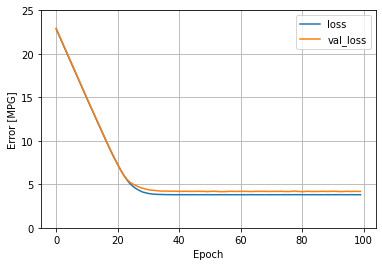

In [ ]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 25])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [ ]:
single_feature_model.evaluate(
    test_features[feature],
    test_labels, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: 3.6466


3.6465961933135986

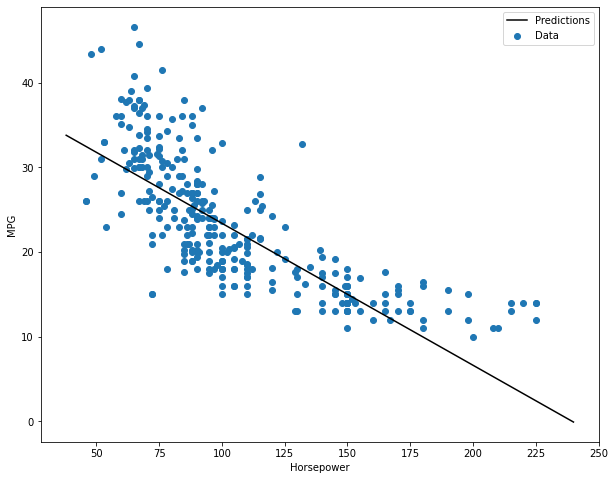

In [ ]:
# predict and plot
range_min = np.min(test_features[feature]) - 10
range_max = np.max(test_features[feature]) + 10
x = tf.linspace(range_min, range_max, 200)
y = single_feature_model.predict(x)
    
plot(feature, x,y)

In [ ]:
dnn_model = keras.Sequential([
    single_feature_normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

In [ ]:
dnn_model.compile(loss=loss, 
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_1 (Normalizati (None, 1)                 3         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________


In [ ]:
dnn_model.fit(
    train_features[feature], train_labels,
    validation_split=0.2,
    verbose=1, epochs=100)

Epoch 1/100
8/8 [==============================] - 1s 28ms/step - loss: 23.1706 - val_loss: 23.4974
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.7384 - val_loss: 23.2515
Epoch 3/100
8/8 [==============================] - 0s 8ms/step - loss: 22.3542 - val_loss: 22.9448
Epoch 4/100
8/8 [==============================] - 0s 8ms/step - loss: 22.1907 - val_loss: 22.5379
Epoch 5/100
8/8 [==============================] - 0s 8ms/step - loss: 21.6729 - val_loss: 21.9995
Epoch 6/100
8/8 [==============================] - 0s 7ms/step - loss: 20.6403 - val_loss: 21.3068
Epoch 7/100
8/8 [==============================] - 0s 8ms/step - loss: 21.1237 - val_loss: 20.4123
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 19.8409 - val_loss: 19.2689
Epoch 9/100
8/8 [==============================] - 0s 7ms/step - loss: 18.5548 - val_loss: 17.8182
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 17.4632 - val_loss: 16.0853
Epoch 11

In [ ]:
dnn_model.evaluate(test_features[feature], test_labels, verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 2.9188


2.91884446144104

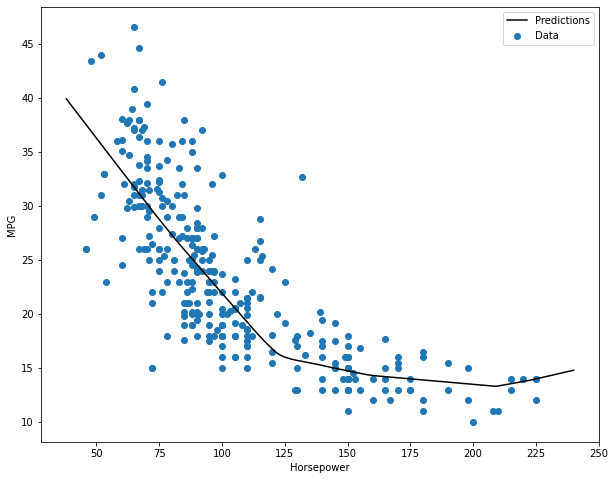

In [ ]:
# predict and plot
x = tf.linspace(range_min, range_max, 200)
y = dnn_model.predict(x)

plot(feature, x,y)

In [ ]:
# multiple inputs
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

print(linear_model.summary())

linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss=loss)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 9)                 19        
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 10        
Total params: 29
Trainable params: 10
Non-trainable params: 19
_________________________________________________________________
None


In [ ]:

linear_model.fit(
    train_features, train_labels, 
    epochs=100,
    verbose=1,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

Epoch 1/100
8/8 [==============================] - 1s 29ms/step - loss: 22.1214 - val_loss: 23.2323
Epoch 2/100
8/8 [==============================] - 0s 7ms/step - loss: 22.4744 - val_loss: 22.5058
Epoch 3/100
8/8 [==============================] - 0s 7ms/step - loss: 20.9379 - val_loss: 21.7777
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 20.3011 - val_loss: 21.0649
Epoch 5/100
8/8 [==============================] - 0s 7ms/step - loss: 19.8434 - val_loss: 20.3558
Epoch 6/100
8/8 [==============================] - 0s 8ms/step - loss: 18.7436 - val_loss: 19.6250
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 18.7913 - val_loss: 18.8840
Epoch 8/100
8/8 [==============================] - 0s 7ms/step - loss: 17.2510 - val_loss: 18.1731
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 16.2887 - val_loss: 17.4512
Epoch 10/100
8/8 [==============================] - 0s 7ms/step - loss: 15.4427 - val_loss: 16.7204
Epoch 11

In [ ]:
linear_model.evaluate(
    test_features, test_labels, verbose=1)

3/3 [==============================] - 0s 5ms/step - loss: 2.4843


2.4843318462371826

# Part 4 CNN

In [3]:
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt

In [5]:
cifar10 = keras.datasets.cifar10


In [6]:
(train_images, train_labels),(test_images, test_labels) = cifar10.load_data()
print(train_images.shape, test_images.shape)

170500096/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (10000, 32, 32, 3)


In [7]:
train_images, test_images = train_images / 255, test_images / 255

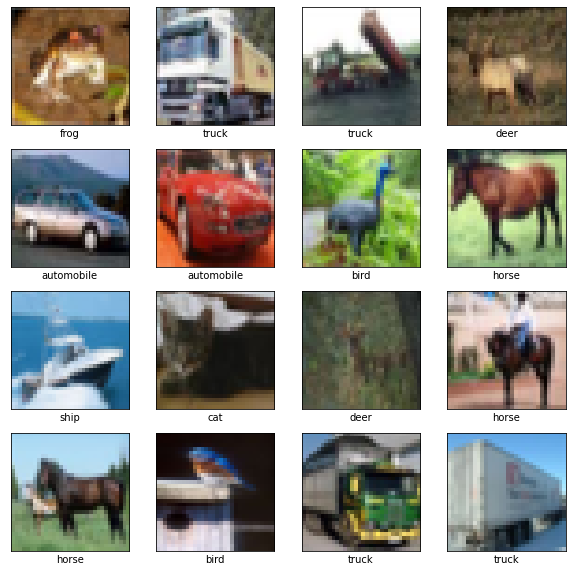

In [9]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

def show():
    plt.figure(figsize=(10,10))
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        # The CIFAR labels happen to be arrays, 
        # which is why you need the extra index
        plt.xlabel(class_names[train_labels[i][0]])
    plt.show()

show()

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), strides = (1,1), padding = 'valid', activation = 'relu', input_shape = (32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, 3, activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
print(model.summary())

loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optim = keras.optimizers.Adam(learning_rate=0.001)
metrics = ['accuracy']

model.compile(optimizer = optim, loss = loss, metrics = metrics)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                73792     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [11]:
batch_size = 64
epochs = 5
model.fit(train_images, train_labels, epochs = epochs, batch_size = batch_size, verbose = 2)

Epoch 1/5
782/782 - 32s - loss: 1.5807 - accuracy: 0.4293
Epoch 2/5
782/782 - 2s - loss: 1.2588 - accuracy: 0.5543
Epoch 3/5
782/782 - 2s - loss: 1.1184 - accuracy: 0.6083
Epoch 4/5
782/782 - 2s - loss: 1.0299 - accuracy: 0.6419
Epoch 5/5
782/782 - 2s - loss: 0.9660 - accuracy: 0.6635


In [14]:
model.evaluate(test_images, test_labels, batch_size = batch_size, verbose = 2)

157/157 - 0s - loss: 1.0102 - accuracy: 0.6437


[1.0101696252822876, 0.6437000036239624]

In [17]:
#save model
model.save('nn.h5')

#load model
model = keras.models.load_model('nn.h5')
model.evaluate(test_images, test_labels, batch_size = batch_size, verbose = 2)

157/157 - 0s - loss: 1.0102 - accuracy: 0.6437


[1.0101696252822876, 0.6437000036239624]

In [18]:
#save weight
model.save_weights('nn_weight.h5')

#load weight
model.load_weights('nn_weight.h5')

In [21]:
#json
json_string = model.to_json()

with open("nn_model.json", "w") as f:
    f.write(json_string)

with open("nn_model.json", "r") as f:
    loaded_json_string = f.read()

new_model = keras.models.model_from_json(loaded_json_string)
print(new_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                73792     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

# Part 5 Functional API
